# 결과

+ best(mae:   1.35) : non-scaling ridge(alpha = 100)이 가장 결과가 좋았다
+ R에서 뽑은 변수들만 출력 :10개

["crm_wthr_흐림","crm_clue_타인신고","crm_clue_피해자신고","crm_clue_현행범","crm_tm_저녁","화재_사망","배치인원_수","비상벨_개수","기초수급_19세이하","외국인수", "score_전반"]

In [1]:
import pandas as pd

#그래프에 한글 표현하기
import  matplotlib.pyplot as plt
import  matplotlib.font_manager as fm
import  matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family = font_name)



#마이너스 표시하기
import  matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]  = False

import numpy as np
import pandas  as pd
import seaborn as sns
##회귀분석
import statsmodels.api as sm
# 정규화
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import  RFE
from lightgbm import LGBMClassifier,  LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR, SVC
import multiprocessing 
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from scipy import stats
#사용법이 파이선과 다른 기존xgb를  파이선에 맞게 만들어 놓은 것
from  xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler

#변수영향도 그래프, 트리그래프 더 쉽게 그리게 해줌
from xgboost import plot_importance, plot_tree

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("../완성본_안전도_회귀분석/5_전반적안전도.csv")

In [ ]:
# 변수8개, 설명력 0.619
# score_전반~+crm_wthr_흐림+crm_clue_피해자신고+crm_clue_현행범+crm_tm_저녁
#           +배치인원_수+비상벨_개수+기초수급_19세이하
#           +외국인수

In [ ]:
# 변수10개, 설명력 0.661
# score_전반~+crm_wthr_흐림+crm_clue_타인신고+crm_clue_피해자신고
#           +crm_clue_현행범+crm_tm_저녁
#           +화재_사망+배치인원_수+비상벨_개수+기초수급_19세이하+외국인수

In [44]:
# #R에서 뽑은 변수들만 출력 :10개
# df = df[["crm_wthr_흐림","crm_clue_피해자신고","crm_clue_현행범","crm_tm_저녁","배치인원_수",
#         "비상벨_개수","기초수급_19세이하","외국인수", "score_전반"]]

In [3]:
#R에서 뽑은 변수들만 출력 :10개
# crm_clue_피해품발견,crm_tm_오후,화재_동산피해_천원, 화재_재산피해_건당천원, 일인가구수
df = df[["crm_wthr_흐림","crm_clue_타인신고","crm_clue_피해자신고","crm_clue_현행범","crm_tm_저녁","화재_사망","배치인원_수",
        "비상벨_개수","기초수급_19세이하","외국인수", "score_전반"]]

In [4]:
df

,crm_wthr_흐림,crm_clue_타인신고,crm_clue_피해자신고,crm_clue_현행범,crm_tm_저녁,화재_사망,배치인원_수,비상벨_개수,기초수급_19세이하,외국인수,score_전반
0,131.0,1275.0,8383.0,1449.0,5317.0,2,395,5.0,39101,15295,74.40
1,150.0,768.0,4526.0,881.0,3356.0,1,258,1.0,39101,24040,68.50
2,94.0,650.0,5755.0,1610.0,4258.0,0,333,8.0,39101,18967,70.85
3,26.0,315.0,1980.0,397.0,1729.0,2,185,11.0,54889,4184,70.75
4,62.0,325.0,1659.0,177.0,1292.0,0,142,12.0,54889,3268,74.45
...,...,...,...,...,...,...,...,...,...,...,...
118,52.0,245.0,1758.0,444.0,1001.0,0,176,499.0,31361,7111,74.60
119,127.0,633.0,4801.0,1136.0,2629.0,1,406,1778.0,46485,9785,68.75
120,113.0,251.0,2438.0,786.0,1328.0,3,236,339.0,6833,11496,73.05
121,50.0,262.0,1571.0,642.0,981.0,4,213,42.0,5756,10641,71.75


<AxesSubplot:>

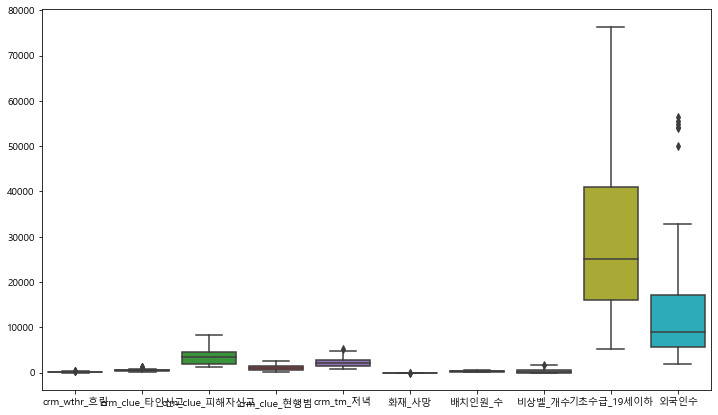

In [13]:
#이상치 확인
#극단값을  갖는  모습을 볼 수 있다 ->robustscale하면  좋을  듯  하다
plt.figure(figsize = (12,7))
sns.boxplot(data = df.iloc[:,:-1])

# 설명력 보기위한 모델링

In [8]:
# train, test 분리
X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df["score_전반"],test_size = 0.3, random_state=0)

# ridge, lasso, elasticnet을 위한 alpha값 찾기 함수

In [4]:
def alphas_finder(model):
    alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
    for alpha in alphas:
        modeling = model(alpha=alpha)
        modeling.fit(X_train, y_train)
        print(alpha , ":" ,round(modeling.score(X_train, y_train),3)
              , round(modeling.score(X_test, y_test),3)
              ,"mae:",round(mean_absolute_error(modeling.predict(X_test), y_test),3))    

# 교차검증

In [9]:
X = np.array(df.drop('score_전반', 1))
Y = np.array(df['score_전반'])

In [5]:
from sklearn.model_selection import KFold

#kfold 설정
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True,random_state=0)

#mae kfold 교차검증 함수
def mae_kfold(model):
    i = 1
    total_error = 0
    for train_index, test_index in kfold.split(X):
        x_train_fold, x_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = Y[train_index], Y[test_index]
        model_pred_fold = model.fit(x_train_fold, y_train_fold).predict(x_test_fold)
        error = mean_absolute_error(model_pred_fold, y_test_fold)
        print('Fold = {}, mae = {:.2f}'.format(i, error))
        total_error += error
        i+=1
    print('---'*10)
    print('Average Error: %s' % (total_error / n_splits))
    print('---'*10)

# 모델링

## 1. None scaling

In [9]:
#다중회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test),mean_absolute_error(lr.predict(X_test), y_test))

0.7154950311375576 0.5239761926355002 1.4686457591910482


In [10]:
# 다중회귀  교차검증
mae_kfold(lr)

Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.3680821692486087
------------------------------


## ridge

In [8]:
# ridge
alphas_finder(Ridge)

100 : 0.711 0.576 mae: 1.444
10 : 0.715 0.532 mae: 1.465
1 : 0.715 0.525 mae: 1.468
0.1 : 0.715 0.524 mae: 1.469
0.01 : 0.715 0.524 mae: 1.469
0.001 : 0.715 0.524 mae: 1.469
0.0001 : 0.715 0.524 mae: 1.469


In [9]:
#best: 1.35
for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    ridge = Ridge(alpha=i)
    mae_kfold(ridge)

Fold = 1, mae = 1.42
Fold = 2, mae = 1.33
Fold = 3, mae = 1.32
Fold = 4, mae = 1.64
Fold = 5, mae = 1.05
------------------------------
Average Error: 1.3526787493256909
------------------------------
Fold = 1, mae = 1.41
Fold = 2, mae = 1.43
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.365774281103262
------------------------------
Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.3678444966954344
------------------------------
Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.3680583309353023
------------------------------
Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.3680797847044022
---------------------------

In [10]:
ridge = Ridge(alpha=100)
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [11]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef').reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'], color = "orange", alpha = 0.8)
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    
    #plt.show()
    

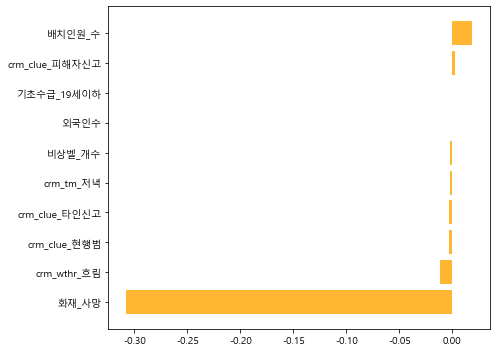

In [12]:
plot_coef(X_train.columns, np.ravel(ridge.coef_) )
plt.savefig('../이미지/변수영향도_전반적안전도.png', dpi=200,bbox_inches='tight')

## Lasso

In [13]:
# lasso
alphas_finder(Lasso)

100 : 0.478 0.62 mae: 1.444
10 : 0.623 0.672 mae: 1.347
1 : 0.677 0.633 mae: 1.406
0.1 : 0.715 0.541 mae: 1.461
0.01 : 0.715 0.526 mae: 1.468
0.001 : 0.715 0.524 mae: 1.469
0.0001 : 0.715 0.524 mae: 1.469


In [14]:
for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    lasso = Lasso(alpha=i)
    mae_kfold(lasso)

Fold = 1, mae = 1.43
Fold = 2, mae = 1.38
Fold = 3, mae = 1.68
Fold = 4, mae = 2.01
Fold = 5, mae = 1.77
------------------------------
Average Error: 1.655159036491312
------------------------------
Fold = 1, mae = 1.36
Fold = 2, mae = 1.14
Fold = 3, mae = 1.64
Fold = 4, mae = 1.74
Fold = 5, mae = 1.27
------------------------------
Average Error: 1.4303619057439554
------------------------------
Fold = 1, mae = 1.47
Fold = 2, mae = 1.14
Fold = 3, mae = 1.45
Fold = 4, mae = 1.70
Fold = 5, mae = 1.12
------------------------------
Average Error: 1.3751943778931919
------------------------------
Fold = 1, mae = 1.41
Fold = 2, mae = 1.41
Fold = 3, mae = 1.32
Fold = 4, mae = 1.64
Fold = 5, mae = 1.05
------------------------------
Average Error: 1.3662934371178501
------------------------------
Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.3678387115130277
---------------------------

## ElasticNet

In [15]:
alphas_finder(ElasticNet)

100 : 0.515 0.65 mae: 1.357
10 : 0.637 0.658 mae: 1.36
1 : 0.701 0.606 mae: 1.424
0.1 : 0.715 0.536 mae: 1.463
0.01 : 0.715 0.525 mae: 1.468
0.001 : 0.715 0.524 mae: 1.469
0.0001 : 0.715 0.524 mae: 1.469


In [16]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    elastic = ElasticNet(alpha=i)
    mae_kfold(elastic)

Fold = 1, mae = 1.35
Fold = 2, mae = 1.31
Fold = 3, mae = 1.75
Fold = 4, mae = 1.97
Fold = 5, mae = 1.57
------------------------------
Average Error: 1.591741140162347
------------------------------
Fold = 1, mae = 1.40
Fold = 2, mae = 1.07
Fold = 3, mae = 1.53
Fold = 4, mae = 1.70
Fold = 5, mae = 1.17
------------------------------
Average Error: 1.376515593237831
------------------------------
Fold = 1, mae = 1.44
Fold = 2, mae = 1.25
Fold = 3, mae = 1.38
Fold = 4, mae = 1.70
Fold = 5, mae = 1.07
------------------------------
Average Error: 1.3671208584231291
------------------------------
Fold = 1, mae = 1.41
Fold = 2, mae = 1.42
Fold = 3, mae = 1.32
Fold = 4, mae = 1.64
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.3659669730946196
------------------------------
Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.3678442092354106
----------------------------

## XGboost

In [17]:
#XG boost
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999998916429977 0.3702077641800937 1.800449969317464


In [18]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 1.40
Fold = 2, mae = 1.72
Fold = 3, mae = 1.35
Fold = 4, mae = 2.10
Fold = 5, mae = 2.06
------------------------------
Average Error: 1.7278360778808601
------------------------------


In [19]:
#XG boost 튜닝
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999495778213 0.6230580831636435 1.3192556432775537


In [20]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 1.51
Fold = 2, mae = 1.67
Fold = 3, mae = 1.57
Fold = 4, mae = 1.86
Fold = 5, mae = 2.11
------------------------------
Average Error: 1.7471662811279312
------------------------------


## lightgbm

In [21]:
#lightgbm
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test),mean_absolute_error(lgbm.predict(X_test), y_test))

0.6950037743384492 0.33536308328397335 1.8566038301235601


In [22]:
#lightgbm교차검증
mae_kfold(xgbr)

Fold = 1, mae = 1.51
Fold = 2, mae = 1.67
Fold = 3, mae = 1.57
Fold = 4, mae = 1.86
Fold = 5, mae = 2.11
------------------------------
Average Error: 1.7471662811279312
------------------------------


-----------
# 2. Scaling

### 각변수 minmaxscaling



In [23]:
#각 변수들을 스케일링 하는 함수

def minmax_scaling(df, scale_columns):
    for col in scale_columns:
        series_min = df[col].min()
        series_max = df[col].max()
        df[col] = df[col].apply(lambda x: (x-series_min)/(series_max-series_min))
        
            
    return df

In [24]:
df.columns

Index(['crm_wthr_흐림', 'crm_clue_타인신고', 'crm_clue_피해자신고', 'crm_clue_현행범',
       'crm_tm_저녁', '화재_사망', '배치인원_수', '비상벨_개수', '기초수급_19세이하', '외국인수',
       'score_전반'],
      dtype='object')

In [25]:
minmax_scaling(df, df.columns[:-1])

,crm_wthr_흐림,crm_clue_타인신고,crm_clue_피해자신고,crm_clue_현행범,crm_tm_저녁,화재_사망,배치인원_수,비상벨_개수,기초수급_19세이하,외국인수,score_전반
0,0.301266,0.966358,1.000000,0.540905,1.000000,0.142857,0.643392,0.002812,0.476709,0.244742,74.40
1,0.349367,0.539950,0.461162,0.315330,0.573788,0.071429,0.301746,0.000562,0.476709,0.405098,68.50
2,0.207595,0.440706,0.632858,0.604845,0.769833,0.000000,0.488778,0.004499,0.476709,0.312075,70.85
3,0.035443,0.158957,0.105476,0.123114,0.220170,0.142857,0.119701,0.006187,0.698292,0.041001,70.75
4,0.126582,0.167368,0.060631,0.035743,0.125190,0.000000,0.012469,0.006749,0.698292,0.024205,74.45
...,...,...,...,...,...,...,...,...,...,...,...
118,0.101266,0.100084,0.074462,0.141779,0.061943,0.000000,0.097257,0.280652,0.368079,0.094673,74.60
119,0.291139,0.426409,0.499581,0.416600,0.415779,0.071429,0.670823,1.000000,0.580343,0.143706,68.75
120,0.255696,0.105130,0.169461,0.277601,0.133015,0.214286,0.246883,0.190664,0.023831,0.175080,73.05
121,0.096203,0.114382,0.048338,0.220413,0.057596,0.285714,0.189526,0.023622,0.008716,0.159402,71.75


# 설명력 보기위한 모델링

In [26]:
# train, test 분리
X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df["score_전반"],test_size = 0.3, random_state=0)

In [27]:
X = np.array(df.drop('score_전반', 1))
Y = np.array(df['score_전반'])

In [28]:
#다중회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test),mean_absolute_error(lr.predict(X_test), y_test))

0.7154950311375581 0.5239761926355007 1.4686457591910451


In [29]:
# 다중회귀  교차검증
mae_kfold(lr)

Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.368082169248605
------------------------------


## ridge

In [30]:
# ridge
alphas_finder(Ridge)

100 : 0.032 0.032 mae: 2.293
10 : 0.18 0.203 mae: 2.084
1 : 0.524 0.499 mae: 1.657
0.1 : 0.7 0.568 mae: 1.435
0.01 : 0.715 0.532 mae: 1.461
0.001 : 0.715 0.525 mae: 1.468
0.0001 : 0.715 0.524 mae: 1.469


In [31]:
for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    ridge = Ridge(alpha=i)
    mae_kfold(ridge)

Fold = 1, mae = 2.18
Fold = 2, mae = 2.17
Fold = 3, mae = 1.85
Fold = 4, mae = 2.42
Fold = 5, mae = 2.43
------------------------------
Average Error: 2.21181527571533
------------------------------
Fold = 1, mae = 1.95
Fold = 2, mae = 2.07
Fold = 3, mae = 1.63
Fold = 4, mae = 2.32
Fold = 5, mae = 2.20
------------------------------
Average Error: 2.0341105227776852
------------------------------
Fold = 1, mae = 1.45
Fold = 2, mae = 1.75
Fold = 3, mae = 1.43
Fold = 4, mae = 1.90
Fold = 5, mae = 1.74
------------------------------
Average Error: 1.6525958942924404
------------------------------
Fold = 1, mae = 1.37
Fold = 2, mae = 1.45
Fold = 3, mae = 1.35
Fold = 4, mae = 1.63
Fold = 5, mae = 1.23
------------------------------
Average Error: 1.4065812927307257
------------------------------
Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.06
------------------------------
Average Error: 1.3709062313550027
----------------------------

## Lasso

In [32]:
# lasso
alphas_finder(Lasso)

100 : 0.0 -0.012 mae: 2.34
10 : 0.0 -0.012 mae: 2.34
1 : 0.0 -0.012 mae: 2.34
0.1 : 0.17 0.262 mae: 1.995
0.01 : 0.698 0.576 mae: 1.437
0.001 : 0.715 0.531 mae: 1.461
0.0001 : 0.715 0.525 mae: 1.468


In [33]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    lasso = Lasso(alpha=i)
    mae_kfold(lasso)

Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 1.90
Fold = 2, mae = 2.02
Fold = 3, mae = 1.59
Fold = 4, mae = 2.34
Fold = 5, mae = 2.23
------------------------------
Average Error: 2.016716778901855
------------------------------
Fold = 1, mae = 1.35
Fold = 2, mae = 1.46
Fold = 3, mae = 1.40
Fold = 4, mae = 1.67
Fold = 5, mae = 1.33
------------------------------
Average Error: 1.4427878358395108
---------------------------

## ElasticNet

In [34]:
alphas_finder(ElasticNet)

100 : 0.0 -0.012 mae: 2.34
10 : 0.0 -0.012 mae: 2.34
1 : 0.0 -0.012 mae: 2.34
0.1 : 0.18 0.219 mae: 2.057
0.01 : 0.601 0.549 mae: 1.562
0.001 : 0.711 0.553 mae: 1.446
0.0001 : 0.715 0.528 mae: 1.463


In [35]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    elastic = ElasticNet(alpha=i)
    mae_kfold(elastic)

Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 1.96
Fold = 2, mae = 2.07
Fold = 3, mae = 1.64
Fold = 4, mae = 2.36
Fold = 5, mae = 2.23
------------------------------
Average Error: 2.0520670122507587
------------------------------
Fold = 1, mae = 1.39
Fold = 2, mae = 1.66
Fold = 3, mae = 1.42
Fold = 4, mae = 1.81
Fold = 5, mae = 1.65
------------------------------
Average Error: 1.5842048739575247
--------------------------

## XGboost

In [36]:
#XG boost
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999998916429977 0.3702077641800937 1.800449969317464


In [37]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 1.40
Fold = 2, mae = 1.72
Fold = 3, mae = 1.35
Fold = 4, mae = 2.10
Fold = 5, mae = 2.06
------------------------------
Average Error: 1.727585266621908
------------------------------


In [38]:
#XG boost 튜닝
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999495778213 0.6230580831636435 1.3192556432775537


In [39]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 1.51
Fold = 2, mae = 1.67
Fold = 3, mae = 1.57
Fold = 4, mae = 1.86
Fold = 5, mae = 2.11
------------------------------
Average Error: 1.7471375946044936
------------------------------


## lightgbm

In [40]:
#lightgbm
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test),mean_absolute_error(lgbm.predict(X_test), y_test))

0.6726624740969483 0.33055064702997783 1.8743341777556597


In [41]:
#lightgbm교차검증
mae_kfold(lgbm)

Fold = 1, mae = 1.62
Fold = 2, mae = 1.73
Fold = 3, mae = 1.62
Fold = 4, mae = 2.17
Fold = 5, mae = 1.96
------------------------------
Average Error: 1.8187725978807283
------------------------------


In [42]:
#SVR
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

print("학습 결과 : ", svr.score(X_train, y_train))
print("테스트 결과 : ", svr.score(X_test, y_test))
print("테스트 결과 : ", mean_absolute_error(svr.predict(X_test), y_test))

학습 결과 :  0.3620814279792761
테스트 결과 :  0.3435881475251422
테스트 결과 :  1.8983586726169839


In [43]:
mae_kfold(svr)

Fold = 1, mae = 1.75
Fold = 2, mae = 1.91
Fold = 3, mae = 1.60
Fold = 4, mae = 2.21
Fold = 5, mae = 1.95
------------------------------
Average Error: 1.8842525016563414
------------------------------


# standardscaling

#### 변수마다 Standard Scaling

- scaling하니까 안좋음

In [46]:
#각 변수들을 스케일링 하는 함수

def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
        
    return df

In [47]:
df.iloc[:,:-1].columns

Index(['crm_wthr_흐림', 'crm_clue_타인신고', 'crm_clue_피해자신고', 'crm_clue_현행범',
       'crm_tm_저녁', '화재_사망', '배치인원_수', '비상벨_개수', '기초수급_19세이하', '외국인수'],
      dtype='object')

In [48]:
standard_scaling(df, df.iloc[:,:-1].columns)

,crm_wthr_흐림,crm_clue_타인신고,crm_clue_피해자신고,crm_clue_현행범,crm_tm_저녁,화재_사망,배치인원_수,비상벨_개수,기초수급_19세이하,외국인수,score_전반
0,0.240481,3.236250,2.797120,0.718369,2.955283,0.204862,0.749224,-0.909420,0.422364,0.159691,74.40
1,0.496171,1.095241,0.538277,-0.249169,1.058816,-0.261768,-0.485270,-0.918843,0.422364,0.889381,68.50
2,-0.257440,0.596939,1.258038,0.992618,1.931133,-0.728398,0.190548,-0.902353,0.422364,0.466086,70.85
3,-1.172538,-0.817731,-0.952782,-1.073620,-0.514642,0.204862,-1.143066,-0.895286,1.224555,-0.767420,70.75
4,-0.688074,-0.775502,-1.140775,-1.448370,-0.937261,-0.728398,-1.530535,-0.892930,1.224555,-0.843852,74.45
...,...,...,...,...,...,...,...,...,...,...,...
118,-0.822648,-1.113334,-1.082796,-0.993560,-1.218685,-0.728398,-1.224164,0.254327,0.029093,-0.523189,74.60
119,0.186652,0.525150,0.699330,0.185201,0.355740,-0.261768,0.848344,3.267347,0.797546,-0.300068,68.75
120,-0.001751,-1.087997,-0.684555,-0.410993,-0.902446,0.671492,-0.683510,-0.122595,-1.217180,-0.157301,73.05
121,-0.849562,-1.041545,-1.192312,-0.656284,-1.238027,1.138121,-0.890761,-0.822257,-1.271902,-0.228643,71.75


# 설명력 보기위한 모델링

In [49]:
# train, test 분리
X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df["score_전반"],test_size = 0.3, random_state=0)

In [50]:
X = np.array(df.drop('score_전반', 1))
Y = np.array(df['score_전반'])

In [51]:
#다중회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test),mean_absolute_error(lr.predict(X_test), y_test))

0.7154950311375579 0.5239761926355002 1.4686457591910445


In [52]:
# 다중회귀  교차검증
mae_kfold(lr)

Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.3680821692486056
------------------------------


## ridge

In [53]:
# ridge
alphas_finder(Ridge)

100 : 0.267 0.274 mae: 2.004
10 : 0.598 0.521 mae: 1.578
1 : 0.709 0.552 mae: 1.444
0.1 : 0.715 0.528 mae: 1.463
0.01 : 0.715 0.524 mae: 1.468
0.001 : 0.715 0.524 mae: 1.469
0.0001 : 0.715 0.524 mae: 1.469


In [54]:
for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    ridge = Ridge(alpha=i)
    mae_kfold(ridge)

Fold = 1, mae = 1.85
Fold = 2, mae = 2.09
Fold = 3, mae = 1.54
Fold = 4, mae = 2.23
Fold = 5, mae = 2.11
------------------------------
Average Error: 1.9618251477036754
------------------------------
Fold = 1, mae = 1.37
Fold = 2, mae = 1.71
Fold = 3, mae = 1.39
Fold = 4, mae = 1.80
Fold = 5, mae = 1.59
------------------------------
Average Error: 1.5730452408941376
------------------------------
Fold = 1, mae = 1.38
Fold = 2, mae = 1.46
Fold = 3, mae = 1.33
Fold = 4, mae = 1.63
Fold = 5, mae = 1.15
------------------------------
Average Error: 1.3911745220171565
------------------------------
Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.05
------------------------------
Average Error: 1.3698227372811576
------------------------------
Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.3682313011092693
--------------------------

## Lasso

In [55]:
# lasso
alphas_finder(Lasso)

100 : 0.0 -0.012 mae: 2.34
10 : 0.0 -0.012 mae: 2.34
1 : 0.0 -0.012 mae: 2.34
0.1 : 0.626 0.555 mae: 1.537
0.01 : 0.715 0.539 mae: 1.455
0.001 : 0.715 0.526 mae: 1.466
0.0001 : 0.715 0.524 mae: 1.468


In [56]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    lasso = Lasso(alpha=i)
    mae_kfold(lasso)

Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 2.19
Fold = 2, mae = 2.11
Fold = 3, mae = 1.85
Fold = 4, mae = 2.40
Fold = 5, mae = 2.42
------------------------------
Average Error: 2.1940793579004287
------------------------------
Fold = 1, mae = 1.36
Fold = 2, mae = 1.67
Fold = 3, mae = 1.49
Fold = 4, mae = 1.83
Fold = 5, mae = 1.77
------------------------------
Average Error: 1.6261698728968816
------------------------------
Fold = 1, mae = 1.39
Fold = 2, mae = 1.45
Fold = 3, mae = 1.33
Fold = 4, mae = 1.63
Fold = 5, mae = 1.09
------------------------------
Average Error: 1.379501985136946
---------------------------

## ElasticNet

In [57]:
alphas_finder(ElasticNet)

100 : 0.0 -0.012 mae: 2.34
10 : 0.0 -0.012 mae: 2.34
1 : 0.099 0.142 mae: 2.157
0.1 : 0.617 0.541 mae: 1.548
0.01 : 0.713 0.545 mae: 1.45
0.001 : 0.715 0.527 mae: 1.465
0.0001 : 0.715 0.524 mae: 1.468


In [58]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    elastic = ElasticNet(alpha=i)
    mae_kfold(elastic)

Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 2.01
Fold = 2, mae = 2.08
Fold = 3, mae = 1.74
Fold = 4, mae = 2.37
Fold = 5, mae = 2.32
------------------------------
Average Error: 2.1036025744223745
------------------------------
Fold = 1, mae = 1.37
Fold = 2, mae = 1.69
Fold = 3, mae = 1.44
Fold = 4, mae = 1.81
Fold = 5, mae = 1.65
------------------------------
Average Error: 1.5894208732122685
------------------------------
Fold = 1, mae = 1.39
Fold = 2, mae = 1.45
Fold = 3, mae = 1.33
Fold = 4, mae = 1.63
Fold = 5, mae = 1.12
------------------------------
Average Error: 1.3858034839755438
--------------------------

## XGboost

In [59]:
#XG boost
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999998916429977 0.36985967504167805 1.8007988594673796


In [60]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 1.41
Fold = 2, mae = 1.72
Fold = 3, mae = 1.35
Fold = 4, mae = 2.10
Fold = 5, mae = 2.06
------------------------------
Average Error: 1.7275913879394538
------------------------------


In [61]:
#XG boost 튜닝
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999495778213 0.6230580831636435 1.3192556432775537


In [62]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 1.51
Fold = 2, mae = 1.68
Fold = 3, mae = 1.57
Fold = 4, mae = 1.86
Fold = 5, mae = 2.11
------------------------------
Average Error: 1.7482429412841811
------------------------------


## lightgbm

In [63]:
#lightgbm
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test),mean_absolute_error(lgbm.predict(X_test), y_test))

0.7114893012183314 0.3313790213921737 1.8907361932889775


In [64]:
#lightgbm교차검증
mae_kfold(lgbm)

Fold = 1, mae = 1.60
Fold = 2, mae = 1.81
Fold = 3, mae = 1.61
Fold = 4, mae = 2.17
Fold = 5, mae = 1.94
------------------------------
Average Error: 1.826205738033717
------------------------------


In [65]:
#SVR
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

print("학습 결과 : ", svr.score(X_train, y_train))
print("테스트 결과 : ", svr.score(X_test, y_test))
print("테스트 결과 : ", mean_absolute_error(svr.predict(X_test), y_test))

학습 결과 :  0.6739676309986693
테스트 결과 :  0.6196776610563045
테스트 결과 :  1.4439787536279542


In [66]:
mae_kfold(svr) 

Fold = 1, mae = 1.37
Fold = 2, mae = 1.48
Fold = 3, mae = 1.27
Fold = 4, mae = 1.77
Fold = 5, mae = 1.29
------------------------------
Average Error: 1.4357778586458432
------------------------------


# RobustScaler

### 각변수 robustscaling



In [69]:
#각 변수들을 스케일링 하는 함수

def robust_scaling(df, scale_columns):
    for col in scale_columns:
        series_med = df[col].median()
        series_per75 = np.percentile(df[col],75)
        series_per25 = np.percentile(df[col],25)
        df[col] = df[col].apply(lambda x: (x-series_med)/(series_per75-series_per25))
        
            
    return df

In [70]:
df.iloc[:,:-1].columns

Index(['crm_wthr_흐림', 'crm_clue_타인신고', 'crm_clue_피해자신고', 'crm_clue_현행범',
       'crm_tm_저녁', '화재_사망', '배치인원_수', '비상벨_개수', '기초수급_19세이하', '외국인수'],
      dtype='object')

In [71]:
robust_scaling(df, df.iloc[:,:-1].columns)

,crm_wthr_흐림,crm_clue_타인신고,crm_clue_피해자신고,crm_clue_현행범,crm_tm_저녁,화재_사망,배치인원_수,비상벨_개수,기초수급_19세이하,외국인수,score_전반
0,0.333333,2.348872,1.845169,0.543224,2.171075,0.5,0.412088,-0.349135,0.558545,0.550122,74.40
1,0.531250,0.824060,0.392164,-0.090351,0.823772,0.0,-0.340659,-0.355154,0.558545,1.315080,68.50
2,-0.052083,0.469173,0.855152,0.722811,1.443490,-0.5,0.071429,-0.344620,0.558545,0.871326,70.85
3,-0.760417,-0.538346,-0.566962,-0.630229,-0.294057,0.5,-0.741758,-0.340105,1.192499,-0.421798,70.75
4,-0.385417,-0.508271,-0.687888,-0.875627,-0.594297,-0.5,-0.978022,-0.338600,1.192499,-0.501924,74.45
...,...,...,...,...,...,...,...,...,...,...,...
118,-0.489583,-0.748872,-0.650593,-0.577803,-0.794229,-0.5,-0.791209,0.394281,0.247751,-0.165763,74.60
119,0.291667,0.418045,0.495762,0.194088,0.324287,0.0,0.472527,2.319037,0.855043,0.068142,68.75
120,0.145833,-0.730827,-0.394425,-0.196319,-0.569564,1.0,-0.461538,0.153499,-0.737151,0.217810,73.05
121,-0.510417,-0.697744,-0.721040,-0.356944,-0.807970,1.5,-0.587912,-0.293454,-0.780397,0.143020,71.75


# 설명력 보기위한 모델링

In [72]:
# train, test 분리
X_train, X_test, y_train, y_test  = train_test_split(df.iloc[:,:-1], df["score_전반"],test_size = 0.3, random_state=0)

In [73]:
X = np.array(df.drop('score_전반', 1))
Y = np.array(df['score_전반'])

In [74]:
#다중회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test),mean_absolute_error(lr.predict(X_test), y_test))

0.7154950311375579 0.5239761926355011 1.4686457591910447


In [75]:
# 다중회귀  교차검증
mae_kfold(lr)

Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.3680821692486056
------------------------------


## ridge

In [76]:
# ridge
alphas_finder(Ridge)

100 : 0.213 0.243 mae: 2.047
10 : 0.513 0.445 mae: 1.698
1 : 0.693 0.561 mae: 1.447
0.1 : 0.715 0.533 mae: 1.458
0.01 : 0.715 0.525 mae: 1.467
0.001 : 0.715 0.524 mae: 1.468
0.0001 : 0.715 0.524 mae: 1.469


In [77]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    ridge = Ridge(alpha=i)
    mae_kfold(ridge)

Fold = 1, mae = 1.91
Fold = 2, mae = 2.14
Fold = 3, mae = 1.58
Fold = 4, mae = 2.30
Fold = 5, mae = 2.17
------------------------------
Average Error: 2.0182557454927252
------------------------------
Fold = 1, mae = 1.46
Fold = 2, mae = 1.95
Fold = 3, mae = 1.42
Fold = 4, mae = 1.94
Fold = 5, mae = 1.77
------------------------------
Average Error: 1.7064165304242256
------------------------------
Fold = 1, mae = 1.34
Fold = 2, mae = 1.50
Fold = 3, mae = 1.35
Fold = 4, mae = 1.65
Fold = 5, mae = 1.26
------------------------------
Average Error: 1.4221509606313638
------------------------------
Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.06
------------------------------
Average Error: 1.3720691687245252
------------------------------
Fold = 1, mae = 1.40
Fold = 2, mae = 1.45
Fold = 3, mae = 1.32
Fold = 4, mae = 1.63
Fold = 5, mae = 1.04
------------------------------
Average Error: 1.3684711393673463
--------------------------

## Lasso

In [78]:
# lasso
alphas_finder(Lasso)

100 : 0.0 -0.012 mae: 2.34
10 : 0.0 -0.012 mae: 2.34
1 : 0.0 -0.012 mae: 2.34
0.1 : 0.524 0.46 mae: 1.699
0.01 : 0.713 0.545 mae: 1.45
0.001 : 0.715 0.526 mae: 1.465
0.0001 : 0.715 0.524 mae: 1.468


In [79]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    lasso = Lasso(alpha=i)
    mae_kfold(lasso)

Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 2.16
Fold = 2, mae = 2.10
Fold = 3, mae = 1.83
Fold = 4, mae = 2.40
Fold = 5, mae = 2.41
------------------------------
Average Error: 2.17889444585276
------------------------------
Fold = 1, mae = 1.49
Fold = 2, mae = 1.92
Fold = 3, mae = 1.55
Fold = 4, mae = 2.00
Fold = 5, mae = 1.86
------------------------------
Average Error: 1.7644346295895612
------------------------------
Fold = 1, mae = 1.38
Fold = 2, mae = 1.46
Fold = 3, mae = 1.34
Fold = 4, mae = 1.64
Fold = 5, mae = 1.12
------------------------------
Average Error: 1.3873222666623106
----------------------------

## ElasticNet

In [80]:
alphas_finder(ElasticNet)

100 : 0.0 -0.012 mae: 2.34
10 : 0.0 -0.012 mae: 2.34
1 : 0.064 0.137 mae: 2.146
0.1 : 0.531 0.46 mae: 1.685
0.01 : 0.706 0.558 mae: 1.441
0.001 : 0.715 0.529 mae: 1.461
0.0001 : 0.715 0.525 mae: 1.468


In [81]:

for i in [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]:
    elastic = ElasticNet(alpha=i)
    mae_kfold(elastic)

Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 2.24
Fold = 2, mae = 2.19
Fold = 3, mae = 1.92
Fold = 4, mae = 2.43
Fold = 5, mae = 2.49
------------------------------
Average Error: 2.2515758606472893
------------------------------
Fold = 1, mae = 2.04
Fold = 2, mae = 2.07
Fold = 3, mae = 1.75
Fold = 4, mae = 2.38
Fold = 5, mae = 2.33
------------------------------
Average Error: 2.1138734628831175
------------------------------
Fold = 1, mae = 1.46
Fold = 2, mae = 1.93
Fold = 3, mae = 1.46
Fold = 4, mae = 1.96
Fold = 5, mae = 1.80
------------------------------
Average Error: 1.7231668312991886
------------------------------
Fold = 1, mae = 1.36
Fold = 2, mae = 1.48
Fold = 3, mae = 1.35
Fold = 4, mae = 1.64
Fold = 5, mae = 1.20
------------------------------
Average Error: 1.4064718008137518
--------------------------

## XGboost

In [82]:
#XG boost
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999998916429977 0.36993370920875857 1.8002087154903947


In [83]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 1.41
Fold = 2, mae = 1.72
Fold = 3, mae = 1.35
Fold = 4, mae = 2.10
Fold = 5, mae = 2.06
------------------------------
Average Error: 1.7277433095296229
------------------------------


In [84]:
#XG boost 튜닝
xgbr = XGBRegressor(n_estimators = 400, learning_rate = 1, max_depth = 3, objective="reg:squarederror")
xgbr.fit(X_train, y_train)
print(xgbr.score(X_train, y_train), xgbr.score(X_test, y_test),mean_absolute_error(xgbr.predict(X_test), y_test))

0.9999999495778213 0.6212256852547399 1.3239079243427987


In [85]:
#XG boost교차검증
mae_kfold(xgbr)

Fold = 1, mae = 1.51
Fold = 2, mae = 1.68
Fold = 3, mae = 1.57
Fold = 4, mae = 1.86
Fold = 5, mae = 2.11
------------------------------
Average Error: 1.7482345184326185
------------------------------


## lightgbm

In [86]:
#lightgbm
lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)
print(lgbm.score(X_train, y_train), lgbm.score(X_test, y_test),mean_absolute_error(lgbm.predict(X_test), y_test))

0.6657725726634958 0.35827182593279916 1.8047746813978396


In [87]:
#lightgbm교차검증
mae_kfold(lgbm)

Fold = 1, mae = 1.56
Fold = 2, mae = 1.77
Fold = 3, mae = 1.65
Fold = 4, mae = 2.23
Fold = 5, mae = 1.89
------------------------------
Average Error: 1.8198780246562785
------------------------------


In [88]:
#SVR
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

print("학습 결과 : ", svr.score(X_train, y_train))
print("테스트 결과 : ", svr.score(X_test, y_test))
print("테스트 결과 : ", mean_absolute_error(svr.predict(X_test), y_test))

학습 결과 :  0.6617849384043624
테스트 결과 :  0.5941104235343473
테스트 결과 :  1.4979700468058426


In [89]:
mae_kfold(svr)

Fold = 1, mae = 1.33
Fold = 2, mae = 1.57
Fold = 3, mae = 1.44
Fold = 4, mae = 1.75
Fold = 5, mae = 1.34
------------------------------
Average Error: 1.4857750626320665
------------------------------
